1.- Importacion de datos y standarizacion de nombre de columnas

In [2]:
import nltk 
import re
nltk.download('cess_esp')



[nltk_data] Downloading package cess_esp to
[nltk_data]     /home/eyacelga/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [3]:
corpus = nltk.corpus.cess_esp.sents()
print(corpus)
print(len(corpus))

[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]
6030


In [4]:
flatten =[w for  l in corpus for w in l]
print(flatten[:20])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana']


In [5]:
arr = [w for w in flatten if re.search('es',w)]
print(arr[:5])

['estatal', 'jueves', 'empresa', 'centrales', 'francesa']


In [6]:
arr = [w for w in flatten if re.search('es$',w)]
print(arr[:5])

['jueves', 'centrales', 'millones', 'millones', 'dólares']


In [7]:
arr = [w for w in flatten if re.search('^es',w)]
print(arr[:5])

['estatal', 'es', 'esta', 'esta', 'eso']


In [8]:
#Rango [a-z] [ghi]
arr = [w for w in flatten if re.search('^[ghi]',w)]
print(arr[:5])

['grupo', 'hoy', 'gas', 'gas', 'intervendrá']


In [9]:
#Clausura
#* repetir 0 o mas veces
arr = [w for w in flatten if re.search('^(no)+',w)]

print(arr[:20])

['norte', 'no', 'no', 'noche', 'no', 'no', 'notificación', 'no', 'no', 'no', 'no_obstante', 'no', 'no', 'no', 'norte', 'no', 'no', 'no', 'no', 'norteamericano']


In [10]:
texto = """ Cuando sea el rey del mundo  (imaginaba él en su cabeza) no tendré que  preocuparme por estas bobadas. 
            Era solo un niño de 7 años, pero pensaba que podría ser cualquier cosa que su imaginación le permitiera visualizar en su cabeza ..."""
print(texto)

 Cuando sea el rey del mundo  (imaginaba él en su cabeza) no tendré que  preocuparme por estas bobadas. 
            Era solo un niño de 7 años, pero pensaba que podría ser cualquier cosa que su imaginación le permitiera visualizar en su cabeza ...


In [11]:
# Caso 1: tokenizacion más simple: por espacios vacios !
print(re.split(r' ', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '', '(imaginaba', 'él', 'en', 'su', 'cabeza)', 'no', 'tendré', 'que', '', 'preocuparme', 'por', 'estas', 'bobadas.', '\n', '', '', '', '', '', '', '', '', '', '', '', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años,', 'pero', 'pensaba', 'que', 'podría', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginación', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '...']


In [12]:
# Caso 2: tokenización usando expresiones regulares
print(re.split(r'[ \t\n]+', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '(imaginaba', 'él', 'en', 'su', 'cabeza)', 'no', 'tendré', 'que', 'preocuparme', 'por', 'estas', 'bobadas.', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años,', 'pero', 'pensaba', 'que', 'podría', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginación', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '...']


In [13]:
# RegEx reference: \W -> all characters other than letters, digits or underscore
print(re.split(r'[ \W\t\n]+', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', 'imaginaba', 'él', 'en', 'su', 'cabeza', 'no', 'tendré', 'que', 'preocuparme', 'por', 'estas', 'bobadas', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años', 'pero', 'pensaba', 'que', 'podría', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginación', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '']


In [14]:
# nuestra antigua regex no funciona en este caso: 
texto = 'En los E.U. esa postal vale $15.50 ...'
print(re.split(r'[ \W\t\n]+', texto))

['En', 'los', 'E', 'U', 'esa', 'postal', 'vale', '15', '50', '']


In [15]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+            # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*         # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;&quot;'?():-_`]    # Hace match con signos de puntuación
'''

In [16]:
nltk.regexp_tokenize(texto, pattern)

['En', 'los', 'E.U.', 'esa', 'postal', 'vale', '$15.50', '...']

In [17]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    |

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [18]:
# escogemos text1 que es el famoso libro Moby Dick
text1

<Text: Moby Dick by Herman Melville 1851>

In [19]:
# Vemos que el texto ya viene tokenizado incluyendo caracteres especiales ....
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [20]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1))
vocabulario[1000:1050]

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [21]:
# luego definimos la medida de riqueza léxica:
rl = len(set(text1))/len(text1)
print(rl)

0.07406285585022564


In [22]:
# podemos definir funciones en python para estas medidas léxicas:
def riqueza_lexica(texto):
  return len(set(texto))/len(texto)

def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [23]:
# podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.
porcentaje_palabra('monster', text1)

0.018786974875296663

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`

In [24]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text1):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic

{'ECKERMANN': 1,
 'sigh': 1,
 'giraffe': 1,
 'wid': 2,
 'density': 2,
 'valley': 6,
 'retreating': 2,
 'charged': 2,
 'Constantine': 1,
 'eloquent': 1,
 'tally': 2,
 'unseamanlike': 1,
 'villain': 1,
 'racket': 2,
 'shades': 6,
 'worked': 8,
 'freer': 2,
 'be': 1030,
 'supremacy': 3,
 'gnaw': 1,
 'conceives': 1,
 'outspread': 1,
 'disobedience': 2,
 'considered': 14,
 'narration': 2,
 'eddied': 1,
 'usually': 5,
 'voracious': 1,
 'seizing': 11,
 'aesthetics': 1,
 'propelled': 1,
 'marches': 2,
 'frequented': 5,
 'charter': 1,
 'Gall': 2,
 'enticing': 1,
 'soulless': 1,
 'tramping': 1,
 'strive': 1,
 'L100': 2,
 'misdoubt': 1,
 'shook': 13,
 'solitary': 19,
 'toadstools': 1,
 'distilled': 1,
 'nails': 7,
 'nosed': 1,
 'extended': 5,
 'pervades': 1,
 'MULTUM': 1,
 'Mt': 1,
 'desire': 8,
 'individuals': 2,
 'feet': 125,
 'invasion': 1,
 'picking': 4,
 'mask': 3,
 'Greenwich': 1,
 'Satan': 3,
 'lips': 18,
 'unconscious': 6,
 'providential': 1,
 'cabin': 79,
 'voicelessly': 1,
 'rats': 1,
 

## Método FreqDist de NLTK

In [25]:
# NLTK tiene un metodo muy eficiente
fdist = FreqDist(text1)

In [26]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

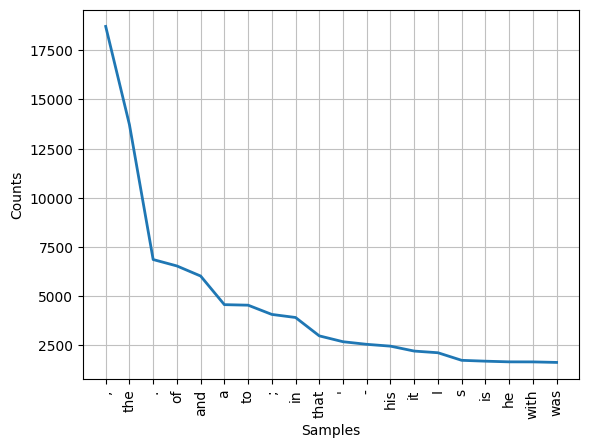

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
fdist.plot(20)

In [28]:
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [29]:
# Tal vez sea más interesante estudiar palabras que tengan una longitud minima especifica
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [30]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

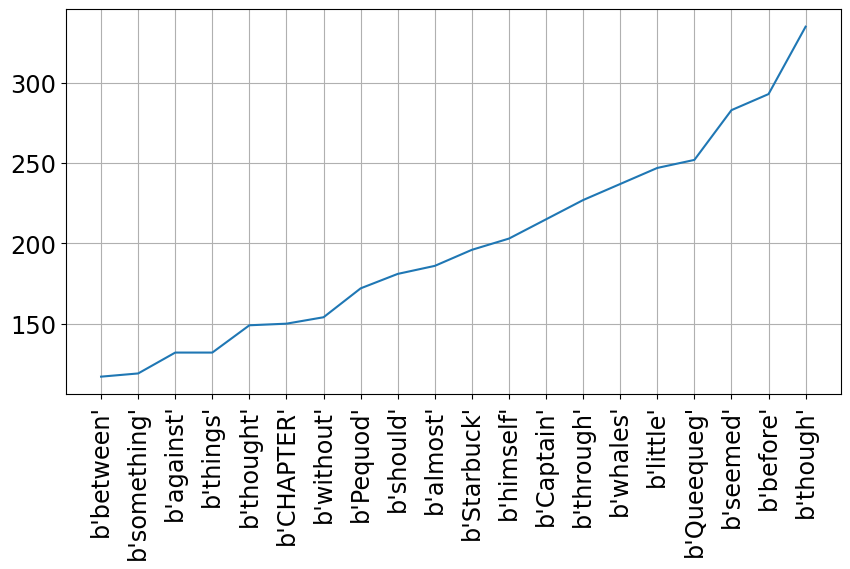

In [31]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()

In [32]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/eyacelga/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    |

#Bi-gramas
* Parejas de palabras que ocurren consecutivas.

In [33]:
list(bigrams(text1))

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '('),
 ('(', 'Supplied'),
 ('Supplied', 'by'),
 ('by', 'a'),
 ('a', 'Late'),
 ('Late', 'Consumptive'),
 ('Consumptive', 'Usher'),
 ('Usher', 'to'),
 ('to', 'a'),
 ('a', 'Grammar'),
 ('Grammar', 'School'),
 ('School', ')'),
 (')', 'The'),
 ('The', 'pale'),
 ('pale', 'Usher'),
 ('Usher', '--'),
 ('--', 'threadbare'),
 ('threadbare', 'in'),
 ('in', 'coat'),
 ('coat', ','),
 (',', 'heart'),
 ('heart', ','),
 (',', 'body'),
 ('body', ','),
 (',', 'and'),
 ('and', 'brain'),
 ('brain', ';'),
 (';', 'I'),
 ('I', 'see'),
 ('see', 'him'),
 ('him', 'now'),
 ('now', '.'),
 ('.', 'He'),
 ('He', 'was'),
 ('was', 'ever'),
 ('ever', 'dusting'),
 ('dusting', 'his'),
 ('his', 'old'),
 ('old', 'lexicons'),
 ('lexicons', 'and'),
 ('and', 'grammars'),
 ('grammars', ','),
 (',', 'with'),
 ('with', 'a'),
 ('a', 'queer'),
 ('que

In [34]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)
md_bigrams[:10]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [35]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

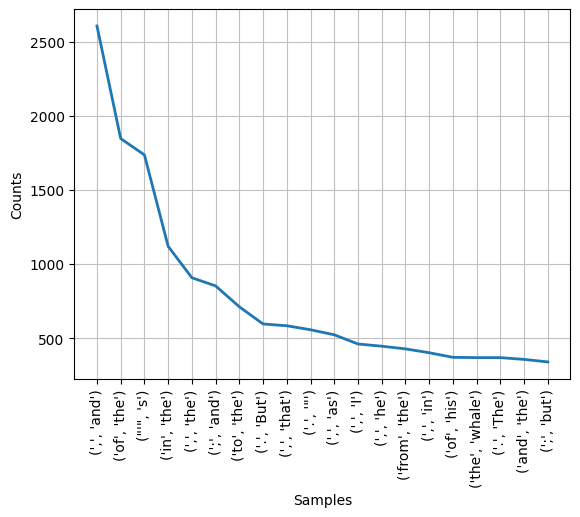

<Axes: xlabel='Samples', ylabel='Counts'>

In [36]:
fdist.plot(20)

## Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

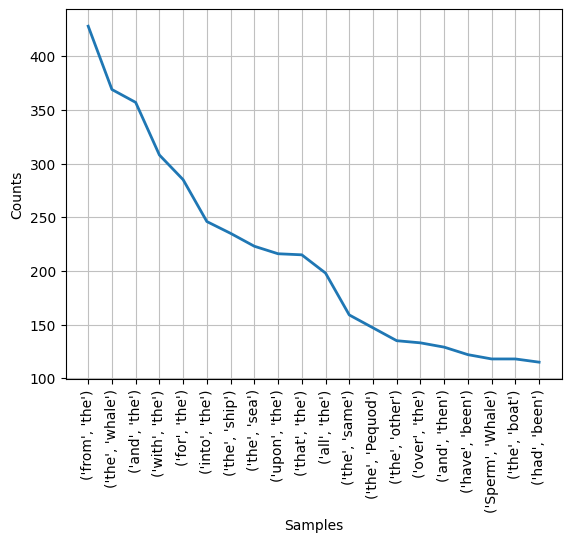

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

# Tri-gramas

In [38]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))
fdist = FreqDist(md_trigrams)
md_trigrams[:10]

[('[', 'Moby', 'Dick'),
 ('Moby', 'Dick', 'by'),
 ('Dick', 'by', 'Herman'),
 ('by', 'Herman', 'Melville'),
 ('Herman', 'Melville', '1851'),
 ('Melville', '1851', ']'),
 ('1851', ']', 'ETYMOLOGY'),
 (']', 'ETYMOLOGY', '.'),
 ('ETYMOLOGY', '.', '('),
 ('.', '(', 'Supplied')]

In [39]:
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

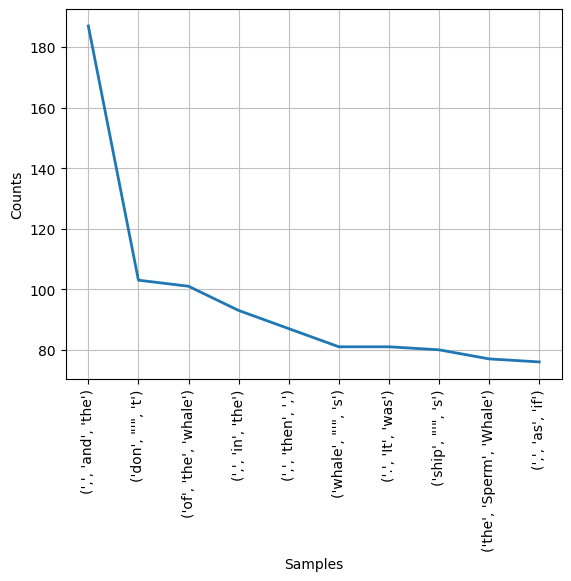

<Axes: xlabel='Samples', ylabel='Counts'>

In [40]:
fdist.plot(10)

# Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [41]:
md_bigrams = list(bigrams(text1))

threshold = 2
#distribution of bi-grams
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)
#distribution of words
filtered_words = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq
0,"(call, those)",call,those,1,52,297
1,"(alike, impresses)",alike,impresses,1,10,1
2,"(Three, punctures)",Three,punctures,1,8,1
3,"(when, felt)",when,felt,1,553,41
4,"(suppose, now)",suppose,now,2,35,646
...,...,...,...,...,...,...
67937,"(Dismal, Swamp)",Dismal,Swamp,1,1,1
67938,"(crushed, leg)",crushed,leg,1,7,86
67939,"(prudently, practicable)",prudently,practicable,1,1,4
67940,"(exhibiting, the)",exhibiting,the,1,2,13721


# Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [42]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
0,"(call, those)",call,those,1,52,297,-13.914759,0.0
1,"(alike, impresses)",alike,impresses,1,10,1,-3.321928,0.0
2,"(Three, punctures)",Three,punctures,1,8,1,-3.000000,0.0
3,"(when, felt)",when,felt,1,553,41,-14.468688,0.0
4,"(suppose, now)",suppose,now,2,35,646,-13.464673,1.0
...,...,...,...,...,...,...,...,...
67937,"(Dismal, Swamp)",Dismal,Swamp,1,1,1,0.000000,0.0
67938,"(crushed, leg)",crushed,leg,1,7,86,-9.233620,0.0
67939,"(prudently, practicable)",prudently,practicable,1,1,4,-2.000000,0.0
67940,"(exhibiting, the)",exhibiting,the,1,2,13721,-14.744098,0.0


In [43]:
df.sort_values(by = 'PMI', ascending=False)


,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
55977,"(grated, nutmeg)",grated,nutmeg,1,1,1,0.000000,0.0
39784,"(Historically, Regarded)",Historically,Regarded,1,1,1,0.000000,0.0
55492,"(Gayer, sallies)",Gayer,sallies,1,1,1,0.000000,0.0
38438,"(vero, sufficit)",vero,sufficit,1,1,1,0.000000,0.0
2774,"(SKY, DARKENS)",SKY,DARKENS,1,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...
53403,"(man, the)",man,the,1,508,13721,-22.732783,0.0
4193,"(some, the)",some,the,1,578,13721,-22.919024,0.0
26484,"(one, the)",one,the,1,889,13721,-23.540138,0.0
52176,"(the, not)",the,not,1,13721,1103,-23.851315,0.0


# Medidas pre-construidas en NLTK


In [44]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [45]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# Textos en Español 


In [46]:
# descargamos corpus en español  https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents() 
flatten_corpus = [w for l in corpus for w in l]

[nltk_data] Downloading package cess_esp to
[nltk_data]     /home/eyacelga/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
